<a href="https://colab.research.google.com/github/bhattacharya5/SpeechUnderstanding/blob/main/MinorProject/M21AIE211_MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/IITJodhpur/Semester5/Speech Analytics/Minor2"

/content/gdrive/MyDrive/Colab Notebooks/IITJodhpur/Semester5/Speech Analytics/Minor2


In [ ]:
pip install mutagen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 4.4 MB/s eta 0:00:00


In [ ]:
import os
import torchaudio
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display
import IPython.display

import time
import zipfile
import mutagen
import mutagen.wave
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from PIL import Image

import math
from IPython.display import Audio

##Download LIBRISPEECH dataset

In [ ]:
# Specify the directory where you want the dataset to be downloaded
download_dir = 'LIBRISPEECH'
# Check if the dataset directory exists
if not os.path.exists(download_dir):
    # Create the directory if it does not exist
    os.makedirs(download_dir, exist_ok=True)

    # Choose a dataset from torchaudio.datasets, for example, LibriSpeech
    librispeech_dataset = torchaudio.datasets.LIBRISPEECH(root=download_dir, download=True)
else:
    # Load audio samples from LibriSpeech dataset
    librispeech_dataset = torchaudio.datasets.LIBRISPEECH(root=download_dir, download=False)

### Plot waveform

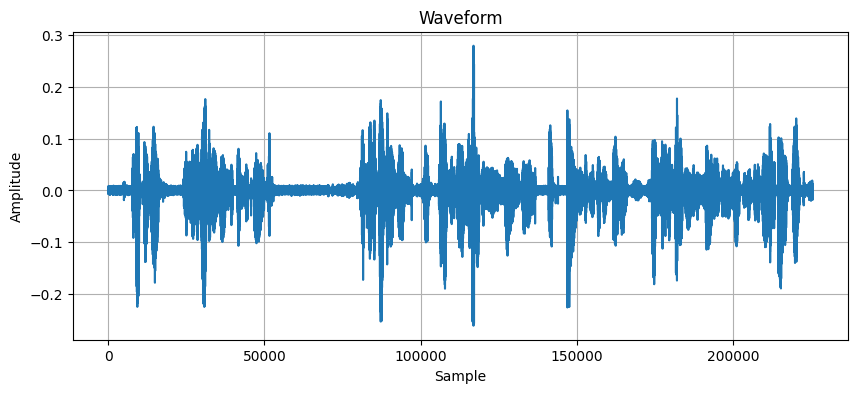

In [ ]:
# Select an index to load a sample from the dataset
index = 0

# Load audio waveform and sample rate for the selected index
waveform, sample_rate, _, _, _, _ = librispeech_dataset[index]

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(waveform.t().numpy())
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.grid(True)
plt.show()

In [ ]:
from IPython.display import Audio
# Play the audio
Audio(data=waveform.numpy(), rate=sample_rate)

###Plot spectogram

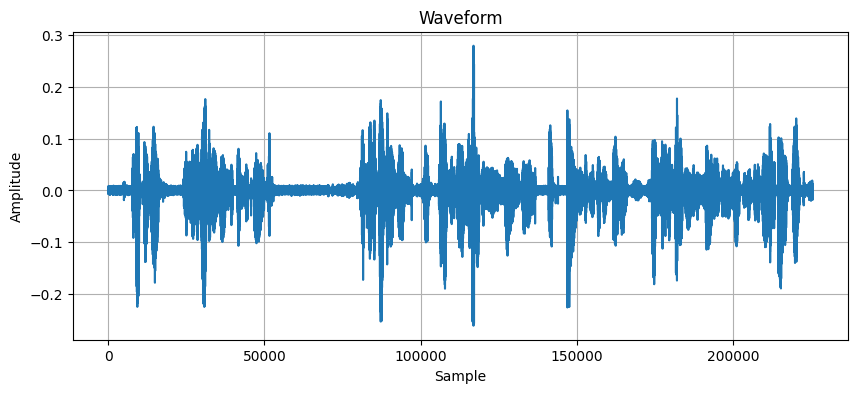

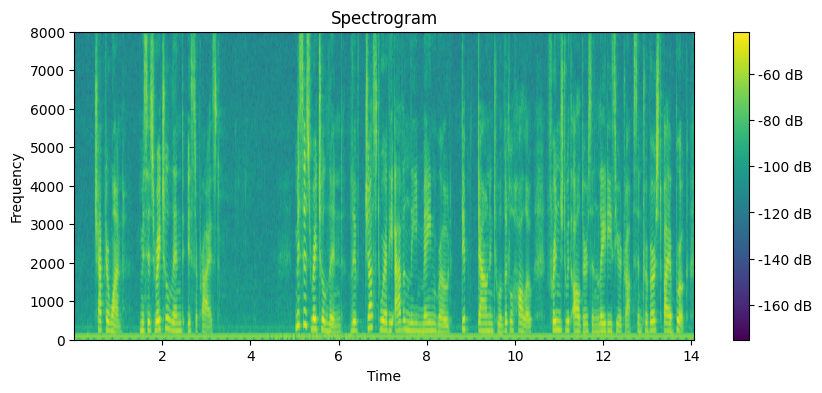

In [ ]:
# Convert waveform to mono if it has more than one channel
if waveform.shape[0] > 1:
    waveform = torch.mean(waveform, dim=0, keepdim=True)

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(waveform.t().numpy())
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.grid(True)
plt.show()

# Compute and plot the spectrogram
plt.figure(figsize=(10, 4))
plt.specgram(waveform.squeeze().numpy(), Fs=sample_rate)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

## Download UrbanSound8K

In [ ]:
ls

 LIBRISPEECH/   M21AIE211_MinorProject.ipynb  'Training autoencoder DB norm.ipynb'


In [ ]:
# Specify the directory where you want the dataset to be downloaded
download_dir = 'UrbanSound8K'
# Check if the dataset directory exists
if not os.path.exists(download_dir):
  # Unzip dataset
  !wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz -O urban8k.tgz
  !tar -xzf urban8k.tgz
  !rm urban8k.tgz

In [ ]:
ls

 LIBRISPEECH/   M21AIE211_MinorProject.ipynb  'Training autoencoder DB norm.ipynb'   UrbanSound8K/


In [ ]:
!cat UrbanSound8K/UrbanSound8K_README.txt

UrbanSound8K

Created By
----------

Justin Salamon*^, Christopher Jacoby* and Juan Pablo Bello*
* Music and Audio Research Lab (MARL), New York University, USA
^ Center for Urban Science and Progress (CUSP), New York University, USA
http://serv.cusp.nyu.edu/projects/urbansounddataset
http://marl.smusic.nyu.edu/
http://cusp.nyu.edu/

Version 1.0


Description
-----------

This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, 
children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, siren, and street_music. The classes are 
drawn from the urban sound taxonomy described in the following article, which also includes a detailed description of 
the dataset and how it was compiled:

J. Salamon, C. Jacoby and J. P. Bello, "A Dataset and Taxonomy for Urban Sound Research", 
22nd ACM International Conference on Multimedia, Orlando USA, Nov. 2014.

All excerpts are taken from field recordings uploaded to www.freesou

In [ ]:
def create_dataset_df(csv_file):
    dataset_df = pd.read_csv(csv_file)
    filepaths = []
    for i, row in dataset_df.iterrows():
        filepaths.append(os.path.join('UrbanSound8K/audio', 'fold'+str(row['fold']), row['slice_file_name']))
    dataset_df['filepath'] = filepaths
    return dataset_df

In [ ]:
dataset_df = create_dataset_df('UrbanSound8K/metadata/UrbanSound8K.csv')
dataset_df.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class                                     filepath  
0          dog_bark    UrbanSound8K/audio/fold5/100032-3-0-0.wav  
1  children_playing  UrbanSound8K/audio/fold5/100263-2-0-117.wav  
2  children_playing  UrbanSound8K/audio/fold5/100263-2-0-121.wav  
3  children_playing  UrbanSound8K/audio/fold5/100263-2-0-126.wav  
4  children_playing  UrbanSound8K/audio/fold5/100263-2-0-137.wav

In [ ]:
dataset_df = dataset_df.drop(columns=['fold', 'slice_file_name', 'fsID', 'start', 'end'])

In [ ]:
# Randomly select one sample of each class
random_samples = dataset_df.groupby('class').sample(1)
audio_samples, labels = random_samples['filepath'].tolist(), random_samples['class'].tolist()

In [ ]:
# Listen to the recordings (index can be changed to listen to a different recording)
index = 2
print('Listen to {} sample'.format(labels[index]))
IPython.display.Audio(audio_samples[index])

Listen to children_playing sample


###Plot waveform

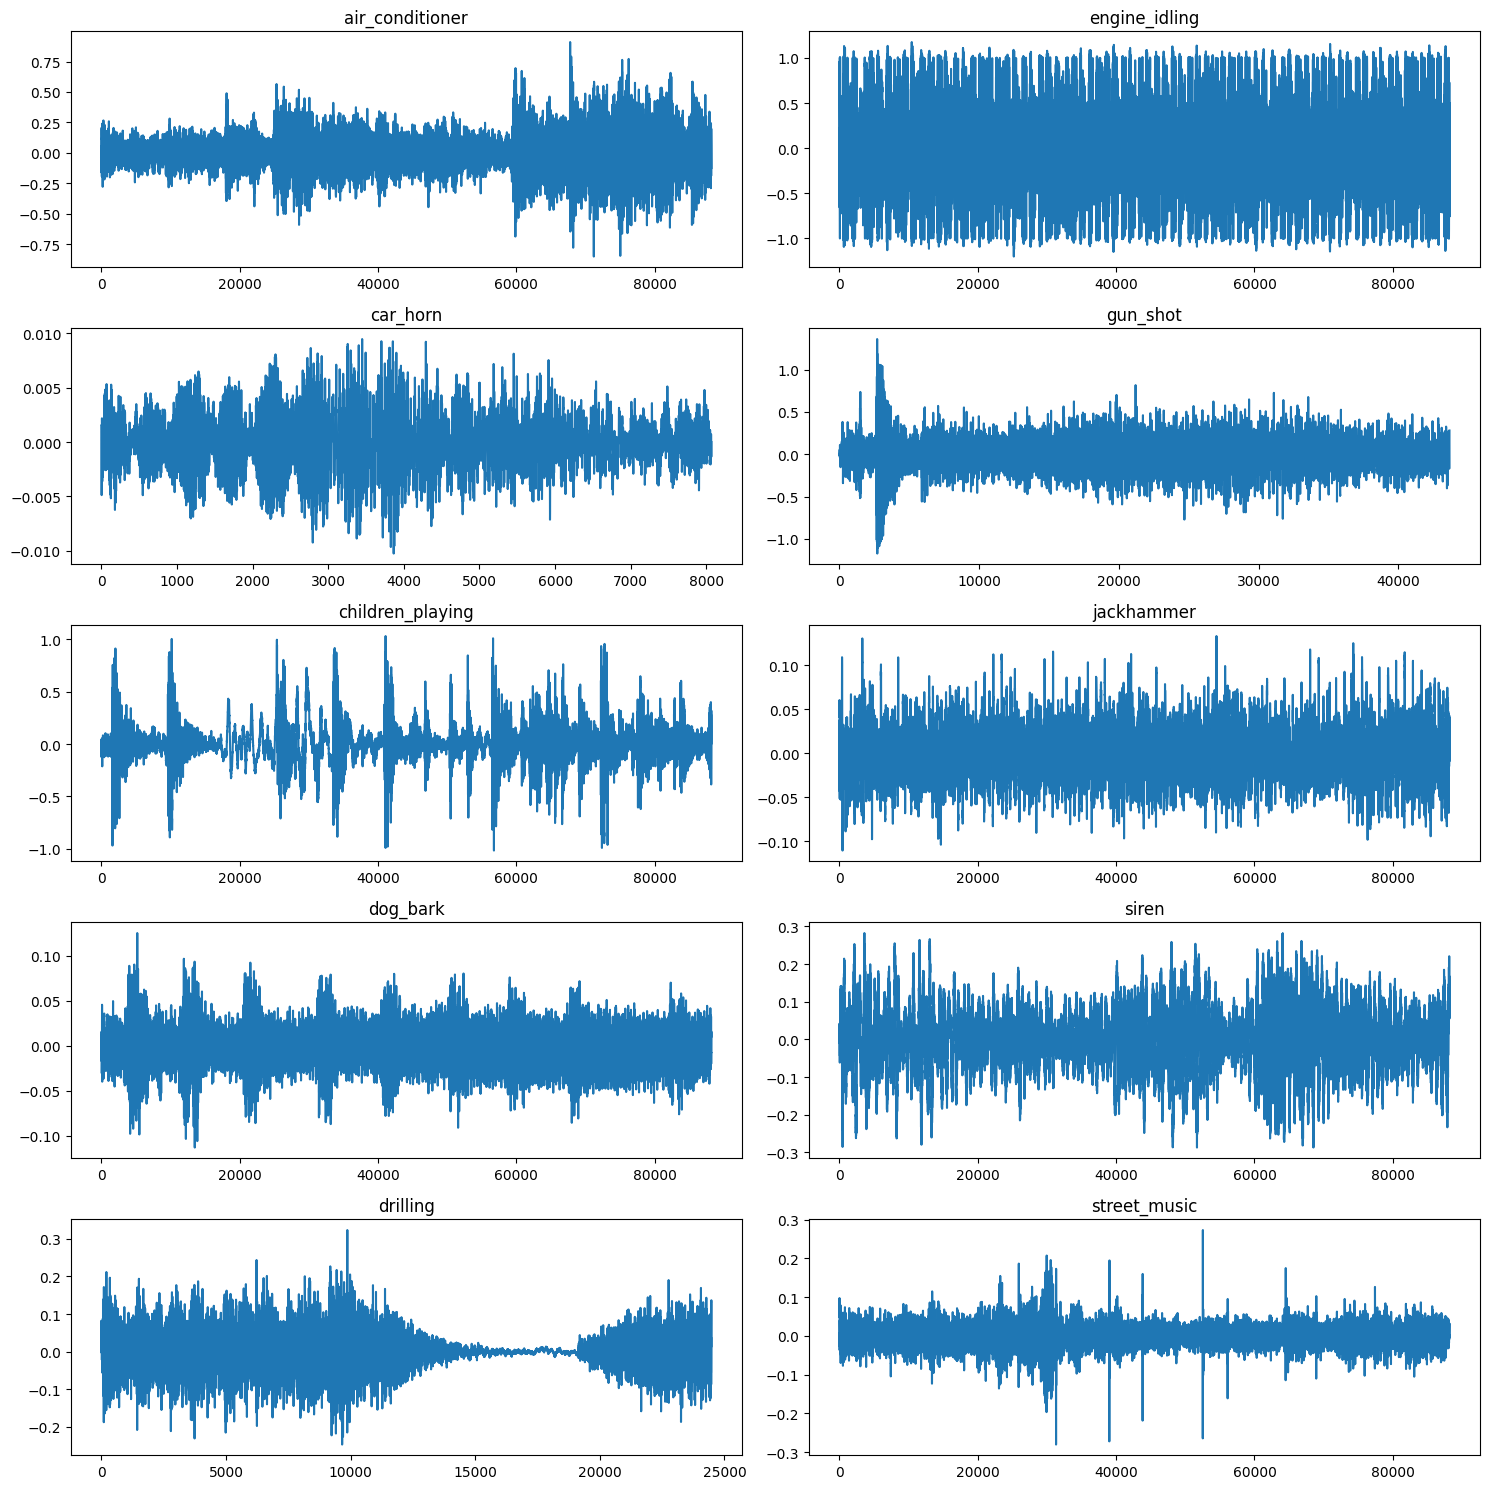

In [ ]:
# Visualize the waveforms
fig, axs = plt.subplots(5, 2, figsize=(15,15))
index = 0
for col in range(2):
    for row in range(5):
        audio_file, sample_rate = librosa.load(audio_samples[index])
        axs[row][col].plot(audio_file)
        axs[row][col].set_title('{}'.format(labels[index]))
        index += 1
fig.tight_layout()


###Plot Spectogram

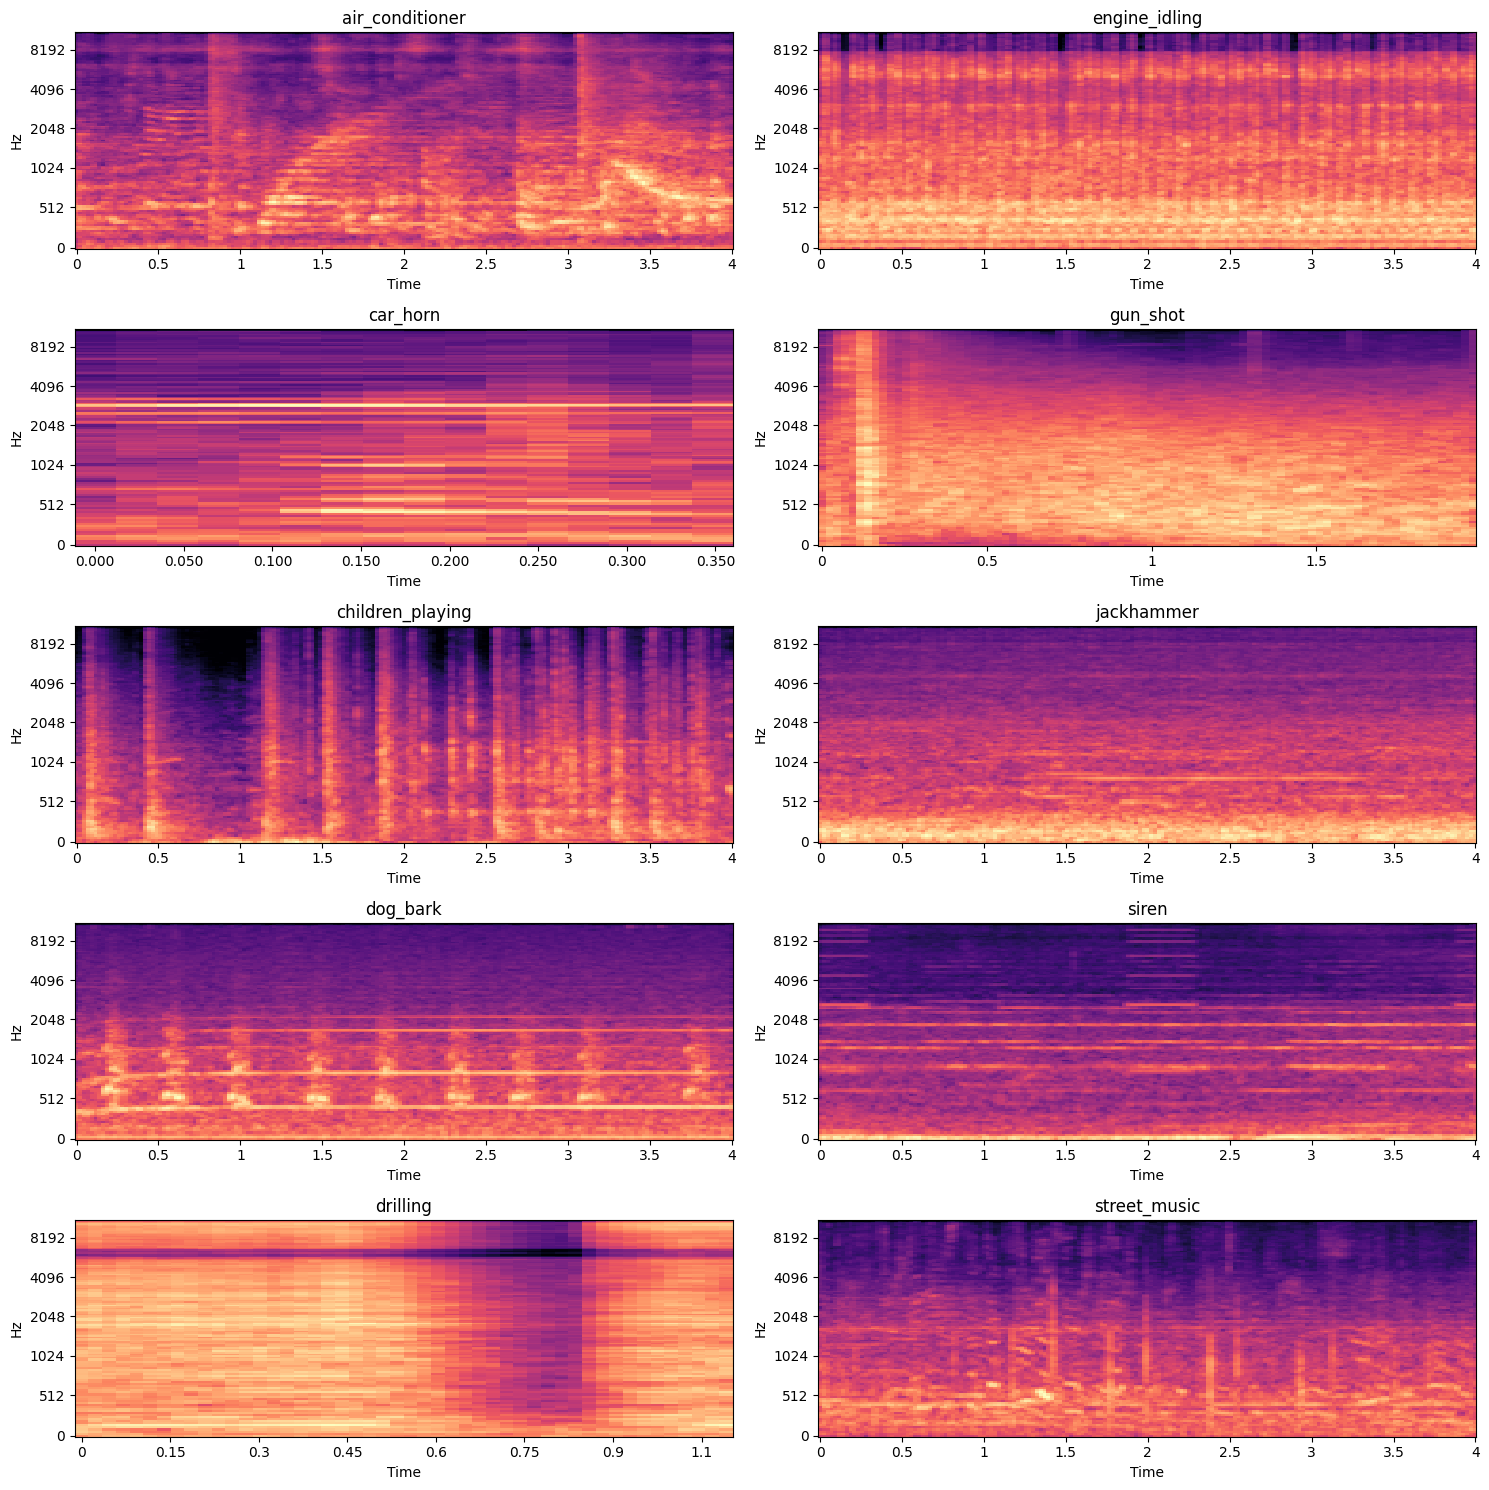

In [ ]:
# Visualize the spectrograms
fig, axs = plt.subplots(5, 2, figsize=(15,15))
index = 0
for col in range(2):
    for row in range(5):
        audio_file, sample_rate = librosa.load(audio_samples[index])
        spectrogram = librosa.feature.melspectrogram(y=audio_file, sr=sample_rate)
        librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), sr=sample_rate, ax=axs[row][col], x_axis='time', y_axis='mel')
        axs[row][col].set_title('{}'.format(labels[index]))
        index += 1
fig.tight_layout()


##Mix combine UrbanSound8K and LIBRISPEECH

In [ ]:
import torch
# Load audio waveform and sample rate for the selected index from LibriSpeech dataset
index = 2  # You can change the index to mix with a different Urban Sound sample
waveform, sample_rate, _, _, _, _ = librispeech_dataset[index]

# Load the audio sample from the Urban Sound dataset
urban_sound_audio, _ = torchaudio.load(audio_samples[index])

# Ensure the lengths of the waveforms match (adjusting the length of the Urban Sound audio to match LibriSpeech)
if urban_sound_audio.size(1) < waveform.size(1):
    urban_sound_audio = torch.nn.functional.pad(urban_sound_audio, (0, waveform.size(1) - urban_sound_audio.size(1)))

# Mix the two audio signals
mixed_audio = waveform + urban_sound_audio[:, :waveform.size(1)]

# Play the mixed audio
Audio(data=mixed_audio.numpy(), rate=sample_rate)


In [ ]:
import os
from tqdm import tqdm  # Import tqdm for tracking progress

# Create the directory for the mixed audio files if it does not exist
mixed_audio_dir = 'mixed_sound'
original_audio_dir = 'original_sound'
os.makedirs(mixed_audio_dir, exist_ok=True)
os.makedirs(original_audio_dir, exist_ok=True)

# Define the number of mixed files to generate
num_mixed_files = 1500

# Iterate through all the LibriSpeech waveforms and mix them with the corresponding Urban Sound audio samples
for idx in tqdm(range(num_mixed_files), desc="Generating Mixed Files"):
    # Load audio waveform and sample rate for the current index from LibriSpeech dataset
    waveform, sample_rate, _, _, _, _ = librispeech_dataset[idx]

    # Load only one urban sound with all Librimix original sounds
    urban_sound_audio, _ = torchaudio.load(audio_samples[2])

    # Ensure the lengths of the waveforms match (adjusting the length of the Urban Sound audio to match LibriSpeech)
    if urban_sound_audio.size(1) < waveform.size(1):
        urban_sound_audio = torch.nn.functional.pad(urban_sound_audio, (0, waveform.size(1) - urban_sound_audio.size(1)))

    # Mix the two audio signals
    mixed_audio = waveform + urban_sound_audio[:, :waveform.size(1)]

    # Save the mixed audio and original audio to a new folder with the same name as the LibriSpeech file and an extension of _mix
    mixed_file_name = os.path.basename(librispeech_dataset._walker[idx]).split('.')[0] + '_mix.wav'
    original_file_name = os.path.basename(librispeech_dataset._walker[idx]).split('.')[0] + '.wav'
    mixed_file_path = os.path.join(mixed_audio_dir, mixed_file_name)
    original_file_path = os.path.join(original_audio_dir, original_file_name)
    torchaudio.save(mixed_file_path, mixed_audio, sample_rate)
    torchaudio.save(original_file_path, waveform, sample_rate)


Generating Mixed Files: 100%|██████████| 1500/1500 [02:08<00:00, 11.67it/s]


In [ ]:
print(range(len(librispeech_dataset)))

range(0, 13012)


In [ ]:
import os

# Specify the path to the "mixed_sound" folder
mixed_sound_folder = 'mixed_sound'
original_sound_folder= 'original_sound'

# Count the number of files in the "mixed_sound" and "original_sound" folder
num_mixed_files = len([name for name in os.listdir(mixed_sound_folder) if os.path.isfile(os.path.join(mixed_sound_folder, name))])
num_original_files = len([name for name in os.listdir(original_sound_folder) if os.path.isfile(os.path.join(original_sound_folder, name))])

# Print the number of files in the "mixed_sound" and "original_sound" folder
print(f"The number of files in the 'mixed_sound' folder is: {num_mixed_files}")
print(f"The number of files in the 'original_sound' folder is: {num_original_files}")


The number of files in the 'mixed_sound' folder is: 1500
The number of files in the 'original_sound' folder is: 1500


## Design CNN auto encoder to train the Librimix mixed and corresponding mixed dataset

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import glob
import os

In [47]:
class LibriMixDataset(Dataset):
    def __init__(self, original_audio_files, mixed_audio_files, transform=None):
        self.original_audio_files = original_audio_files
        self.mixed_audio_files = mixed_audio_files
        self.transform = transform

    def __len__(self):
        return len(self.original_audio_files)

    def __getitem__(self, index):
        # Load the original waveform and mixed waveform
        original_waveform, _ = torchaudio.load(self.original_audio_files[index])
        mixed_waveform, _ = torchaudio.load(self.mixed_audio_files[index])

        # Generate spectrograms for the original and mixed waveforms
        original_spectrogram = self.generate_spectrogram(original_waveform)
        mixed_spectrogram = self.generate_spectrogram(mixed_waveform)

        if self.transform:
            original_spectrogram = self.transform(original_spectrogram)
            mixed_spectrogram = self.transform(mixed_spectrogram)

        return original_spectrogram, mixed_spectrogram

    def generate_spectrogram(self, waveform):
        spectrogram = T.MelSpectrogram()(waveform)
        return spectrogram

In [48]:
# Define the autoencoder CNN network
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 4, 3, stride=2, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [49]:
# Initialize the autoencoder model and dataset
autoencoder = Autoencoder()

# Directory paths for original and mixed audio files
original_sound_dir = "original_sound"
mixed_sound_dir = "mixed_sound"

# Get the file paths for original and mixed audio files
original_audio_files = glob.glob(os.path.join(original_sound_dir, "*.wav"))
mixed_audio_files = glob.glob(os.path.join(mixed_sound_dir, "*.wav"))

# Optional: Transformation to be applied
transform = None

# Instantiate the LibriMixDataset
librimix_dataset = LibriMixDataset(original_audio_files, mixed_audio_files, transform)

In [52]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)


# Train the autoencoder
num_epochs = 1
for epoch in range(num_epochs):
    running_loss = 0.0
    for original_spectrogram, _ in tqdm(DataLoader(librimix_dataset, batch_size=1, shuffle=True)):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = autoencoder(original_spectrogram)

        # Calculate the loss
        loss = criterion(outputs[:, :, :original_spectrogram.size(2), :original_spectrogram.size(3)], original_spectrogram)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Loss: {running_loss/len(librimix_dataset)}")

100%|██████████| 1500/1500 [03:37<00:00,  6.91it/s]

Epoch 1 - Loss: 60.76277282822132


In [71]:
# Save the trained model
torch.save(autoencoder.state_dict(), 'autoencoder_model.pth')

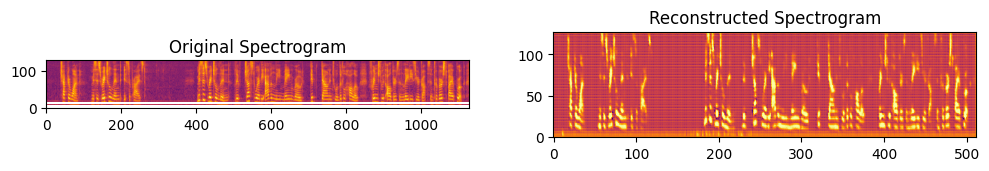

In [63]:
import skimage.transform

# Plot a sample spectrogram from the dataset and its corresponding reconstructed spectrogram
sample_original_spectrogram, _ = librimix_dataset[0]
reconstructed_spectrogram = autoencoder(sample_original_spectrogram.unsqueeze(0))
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Spectrogram')
plt.imshow(sample_original_spectrogram.squeeze(0).log2().numpy(), cmap='inferno', origin='lower')


# Add a singleton dimension for color channel
reconstructed_spectrogram = reconstructed_spectrogram.squeeze(0).detach().log2().numpy()
if reconstructed_spectrogram.ndim == 2:
    reconstructed_spectrogram = reconstructed_spectrogram[np.newaxis, ...]
# Resize the reconstructed spectrogram to a smaller width
reconstructed_spectrogram_resized = skimage.transform.resize(reconstructed_spectrogram, (reconstructed_spectrogram.shape[0], reconstructed_spectrogram.shape[1], 512), anti_aliasing=True)

# Plot the resized reconstructed spectrogram
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_spectrogram_resized.squeeze(0), cmap='inferno', origin='lower')
plt.title('Reconstructed Spectrogram')
plt.show()


##Evaluate the model performance

In [66]:
import torch
# Load audio waveform and sample rate for the selected index from LibriSpeech dataset
index = 2
waveform, sample_rate, _, _, _, _ = librispeech_dataset[1600]

# Load the audio sample from the Urban Sound dataset
urban_sound_audio, _ = torchaudio.load(audio_samples[index])

# Ensure the lengths of the waveforms match (adjusting the length of the Urban Sound audio to match LibriSpeech)
if urban_sound_audio.size(1) < waveform.size(1):
    urban_sound_audio = torch.nn.functional.pad(urban_sound_audio, (0, waveform.size(1) - urban_sound_audio.size(1)))

# Mix the two audio signals
mixed_audio = waveform + urban_sound_audio[:, :waveform.size(1)]

# Play the mixed audio
print('A Random Original Sound')
Audio(data=waveform.numpy(), rate=sample_rate)

A Random Original Sound


In [67]:
# Play the mixed audio
print('A Mixed sound reproduction of the Original Sound')
Audio(data=mixed_audio.numpy(), rate=sample_rate)

A Mixed sound reproduction of the Original Sound


In [72]:
import torch
from IPython.display import Audio

# Define the autoencoder model with the same architecture
autoencoder_eval = Autoencoder()

# Load the saved parameters into the model
autoencoder_eval.load_state_dict(torch.load('autoencoder_model.pth'))

# Set the model to evaluation mode
autoencoder_eval.eval()

# Pass the mixed audio through the autoencoder to obtain the reconstructed audio
reconstructed_audio = autoencoder_eval(mixed_audio.unsqueeze(0))

# Convert the reconstructed audio tensor to a numpy array
reconstructed_waveform = reconstructed_audio.squeeze(0).detach().numpy()

# Play the reconstructed audio
Audio(data=reconstructed_waveform, rate=sample_rate)
